<a href="https://colab.research.google.com/github/mmishra1092/Online-Retail-Customer-Segmentation-/blob/main/MAYANK_MISHRA_Online_Retail_Customer_Segmentation_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Extraction/identification of major topics & themes discussed in news articles. </u></b>

## <b> Problem Description </b>

### In this project, your task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

## <b> Data Description </b>

### <b>Attribute Information: </b>

* ### InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
* ### StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
* ### Description: Product (item) name. Nominal.
* ### Quantity: The quantities of each product (item) per transaction. Numeric.
* ### InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
* ### UnitPrice: Unit price. Numeric, Product price per unit in sterling.
* ### CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
* ### Country: Country name. Nominal, the name of the country where each customer resides.

# **Loading Dataset and Importing Modules**

In [409]:
# Import all the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from datetime import datetime
import datetime as dt
import warnings
warnings.filterwarnings('ignore')

In [410]:
# Mount the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [411]:
# Upload the data path
working_path = '/content/drive/MyDrive/Module: 4/Week_5/Capstone Project: Unsupervised ML: Clustering/Online Retail.xlsx'

In [412]:
# Read Dataset
customer_df = pd.read_excel(working_path)

# **Dataset Information and Summary**

In [413]:
# View first 5 rows of the dataset
customer_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [414]:
# View last 5 rows of the dataset
customer_df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [415]:
# Lets check the shape of the dataset
customer_df.shape

(541909, 8)

In [416]:
# Get all the features of dataset
customer_df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

# **Feature Discription**

*   InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
*   StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
*   Description: Product (item) name. Nominal.
*   Quantity: The quantities of each product (item) per transaction. Numeric.
*   InvoiceDate: Invoice Date and time. Numeric, the day and time when each transaction was generated.
*  UnitPrice: Unit price. Numeric, Product price per unit in sterling.
*   CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
*   Country: Country name. Nominal, the name of the country where each customer resides.

In [417]:
# Check all the information summary of dataset
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [418]:
# Check the uunique values
customer_df.nunique()

InvoiceNo      25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64

In [419]:
# View the description of the dataset
customer_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,541909.0,9.552250,218.081158,-80995.00,1.00,3.00,10.00,80995.0
UnitPrice,541909.0,4.611114,96.759853,-11062.06,1.25,2.08,4.13,38970.0
CustomerID,406829.0,15287.690570,1713.600303,12346.00,13953.00,15152.00,16791.00,18287.0


# Data Preprocessing

In [420]:
# Check the missing values
customer_df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

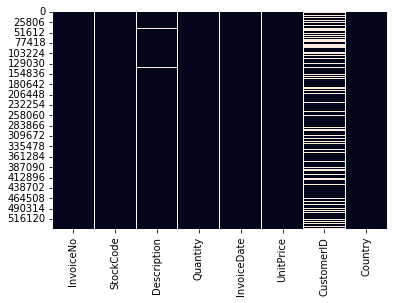

In [421]:
# Plotting the null values on heatmap
sns.heatmap(customer_df.isnull(), cbar = False)

Insight: It is evident from above plot that there are some null values in features Description and CustomerID.

In [422]:
# Lets Drop the null value
customer_df.dropna(inplace = True)

In [423]:
# Lets check the information summary after dropping null values
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


In [424]:
# View the shape of dataset after dropping null values
customer_df.shape

(406829, 8)

Conclusion: After removing all the null values the observation in our dataset redces to (406829, 8)

In [425]:
# Check duplicate values in our dataset
len(customer_df[customer_df.duplicated()])

5225

Conclusion: We can see that there are 5225 duplicate values in our dataset.


In [426]:
# Lets view the duplicate values in our dataset
customer_df[customer_df.duplicated()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2010-12-01 11:45:00,2.10,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2010-12-01 11:45:00,2.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908.0,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,2010-12-01 11:49:00,2.95,17920.0,United Kingdom
...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,2011-12-09 11:34:00,0.39,14446.0,United Kingdom
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,2011-12-09 11:34:00,2.49,14446.0,United Kingdom
541692,581538,22992,REVOLVER WOODEN RULER,1,2011-12-09 11:34:00,1.95,14446.0,United Kingdom
541699,581538,22694,WICKER STAR,1,2011-12-09 11:34:00,2.10,14446.0,United Kingdom


Insight: We can see the duplicate vaues in above description. 

In [427]:
# Now drop the duplicate values from the datase
customer_df.drop_duplicates()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


Insight: After dropping the duplicate values the shape of the dataset changes to(401604, 8)



*   We also need to drop some InvoiceNo which starts with 'c' as it indicates cancellation.



In [428]:
# Lets check the InviceNo that starts with c
customer_df['InvoiceNo'] = customer_df['InvoiceNo'].astype('str')
customer_df[customer_df['InvoiceNo'].str.contains('C')]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


In [429]:
customer_df = customer_df[~customer_df['InvoiceNo'].str.contains('C')]
customer_df.shape

(397924, 8)

In [430]:
# Convert InvoiceDate column into 'year','month','day','hour','minute' and second
customer_df['InvoiceDate_year'] = customer_df['InvoiceDate'].dt.year
customer_df['InvoiceDate_month'] = customer_df['InvoiceDate'].dt.month
customer_df['InvoiceDate_day'] = customer_df['InvoiceDate'].dt.day
customer_df['InvoiceDate_hour'] = customer_df['InvoiceDate'].dt.hour
customer_df['InvoiceDate_minute'] = customer_df['InvoiceDate'].dt.minute
customer_df['InvoiceDate_second'] = customer_df['InvoiceDate'].dt.second
print('columns and data types')
pd.DataFrame(customer_df.dtypes).rename(columns = {0:'dtype'})

columns and data types


,dtype
InvoiceNo,object
StockCode,object
Description,object
Quantity,int64
InvoiceDate,datetime64[ns]
UnitPrice,float64
CustomerID,float64
Country,object
InvoiceDate_year,int64
InvoiceDate_month,int64


In [431]:
()# Lets again check shape of the dataset
customer_df.shape

(397924, 14)

In [432]:
# View the added columns in data
customer_df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'InvoiceDate_year',
       'InvoiceDate_month', 'InvoiceDate_day', 'InvoiceDate_hour',
       'InvoiceDate_minute', 'InvoiceDate_second'],
      dtype='object')

# Exploratory Data Analysis(EDA)

First lets analyze the customers. We will check if each row has a single customer or not. If not than how many customers id we have.

In [433]:
# Lets check the unique id of the customer
customer_df['CustomerID'].nunique()

4339

Conclusion: In 397924 rows we have 4339 customers only.

In [434]:
# Most active customers
active_customers = pd.DataFrame(customer_df['CustomerID'].value_counts().sort_values(ascending = False).reset_index())
active_customers.rename(columns = {'index':'CustomerID', 'CustomerID':'Count'},inplace = True)
active_customers

,CustomerID,Count
0,17841.0,7847
1,14911.0,5677
2,14096.0,5111
3,12748.0,4596
4,14606.0,2700
...,...,...
4334,16990.0,1
4335,16148.0,1
4336,13391.0,1
4337,13366.0,1


Text(0, 0.5, 'Count')

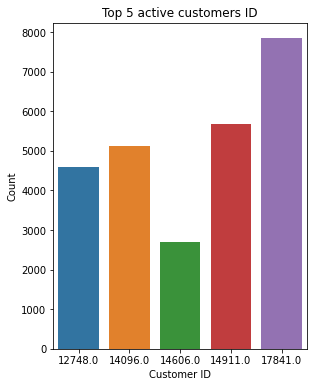

In [435]:
# Now lets plot the top 5 customers
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.barplot(active_customers['CustomerID'][:5],active_customers['Count'][:5])
plt.title('Top 5 active customers ID')
plt.xlabel('Customer ID')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

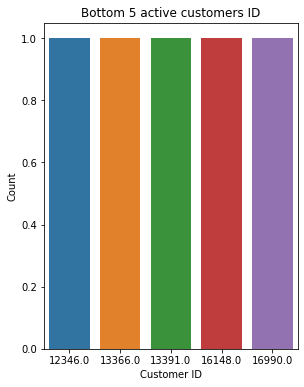

In [436]:
# Bottom 5 customer id
plt.figure(figsize=(10,6))
plt.subplot(1,2,2)
sns.barplot(active_customers['CustomerID'][-5:],active_customers['Count'][-5:])
plt.title('Bottom 5 active customers ID')
plt.xlabel('Customer ID')
plt.ylabel('Count')

# Analysis of categorical features

In [437]:
# Analyze categorical features
categorical_columns = list(customer_df.select_dtypes(['object']).columns)
categorical_features = pd.Index(categorical_columns)
categorical_features

Index(['InvoiceNo', 'StockCode', 'Description', 'Country'], dtype='object')

In [438]:
# View the Invoiceno counts
customer_df['InvoiceNo'].value_counts()

576339    542
579196    533
580727    529
578270    442
573576    435
         ... 
565591      1
542915      1
567486      1
567362      1
576586      1
Name: InvoiceNo, Length: 18536, dtype: int64

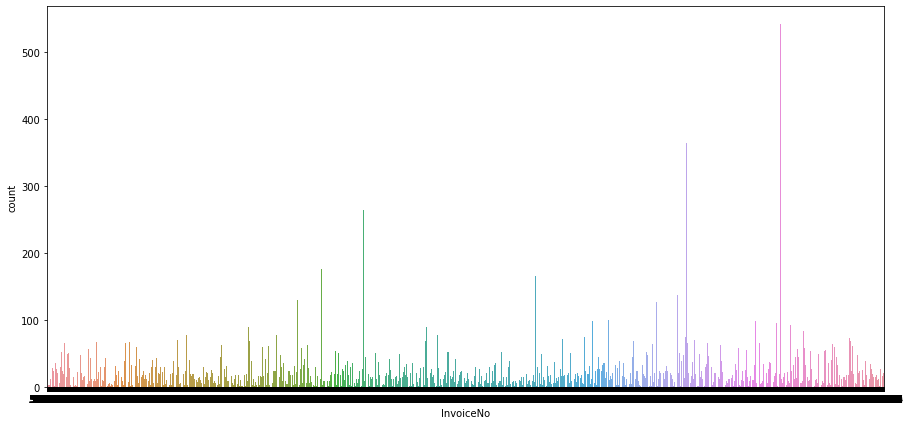

In [439]:
# Plot the invoice count
plt.figure(figsize=(15,7))
sns.countplot(x = 'InvoiceNo', data = customer_df)

# **StockCode**

In [440]:
# Create a variable and count the stockcode
stockcode_df = customer_df['StockCode'].value_counts().reset_index()
stockcode_df.rename(columns={'index': 'StockCode_Name'}, inplace=True)
stockcode_df.rename(columns={'StockCode': 'Count'}, inplace=True)
stockcode_df.head()

,StockCode_Name,Count
0,85123A,2035
1,22423,1724
2,85099B,1618
3,84879,1408
4,47566,1397


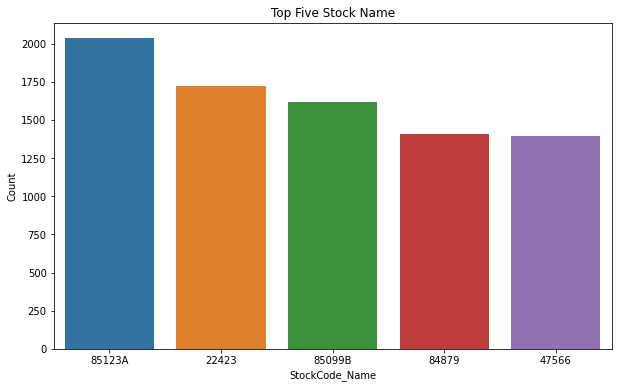

In [441]:
# Plot top 5 stock name
plt.figure(figsize=(10,6))
plt.title('Top Five Stock Name')
sns.barplot(x = 'StockCode_Name', y= 'Count', data = stockcode_df[:5])

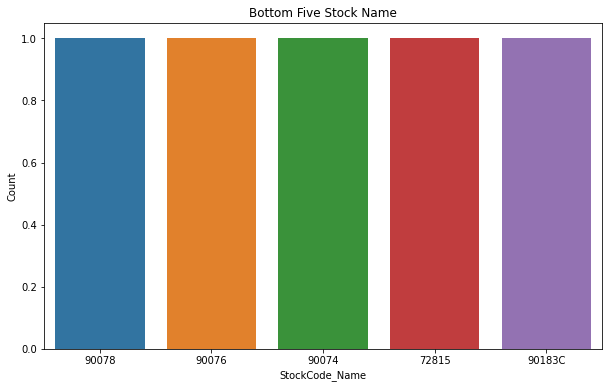

In [442]:
# Plot bottom 5 stock name
plt.figure(figsize=(10,6))
plt.title('Bottom Five Stock Name')
sns.barplot(x = 'StockCode_Name', y= 'Count', data = stockcode_df[-5:])

# **Description**

In [443]:
# Create a variable and check the description variable
Description_df = customer_df['Description'].value_counts().reset_index()
Description_df.rename(columns = {'index':'Description_Name'},inplace = True)
Description_df.rename(columns = {'Description':'Count'}, inplace = True)
Description_df.head()

,Description_Name,Count
0,WHITE HANGING HEART T-LIGHT HOLDER,2028
1,REGENCY CAKESTAND 3 TIER,1724
2,JUMBO BAG RED RETROSPOT,1618
3,ASSORTED COLOUR BIRD ORNAMENT,1408
4,PARTY BUNTING,1397


In [444]:
# Bottom 5 product
Description_df.tail()

,Description_Name,Count
3872,BLACK GLASS BRACELET W HEART CHARMS,1
3873,SILVER BOOK MARK WITH BEADS,1
3874,JARDIN ETCHED GLASS BUTTER DISH,1
3875,NEW BAROQUE B'FLY NECKLACE PINK,1
3876,PINK DAISY BAG CHARM,1


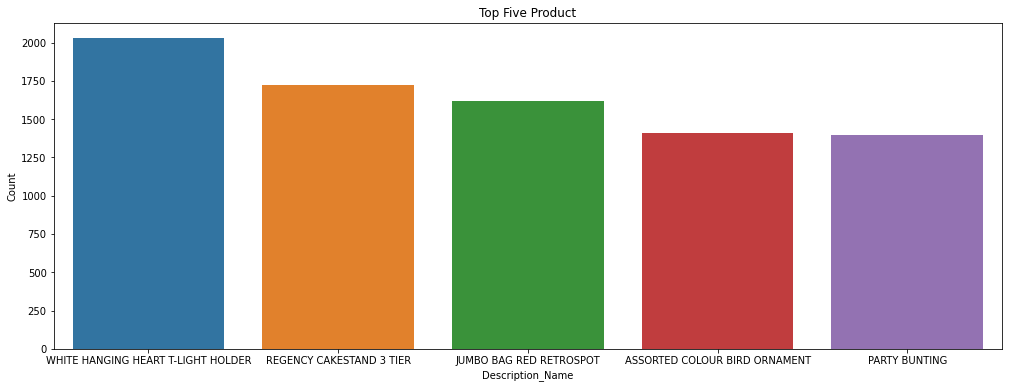

In [445]:
# Plot the top 5 product
plt.figure(figsize=(17,6))
plt.title('Top Five Product')
sns.barplot(x='Description_Name', y='Count', data = Description_df.head(5))

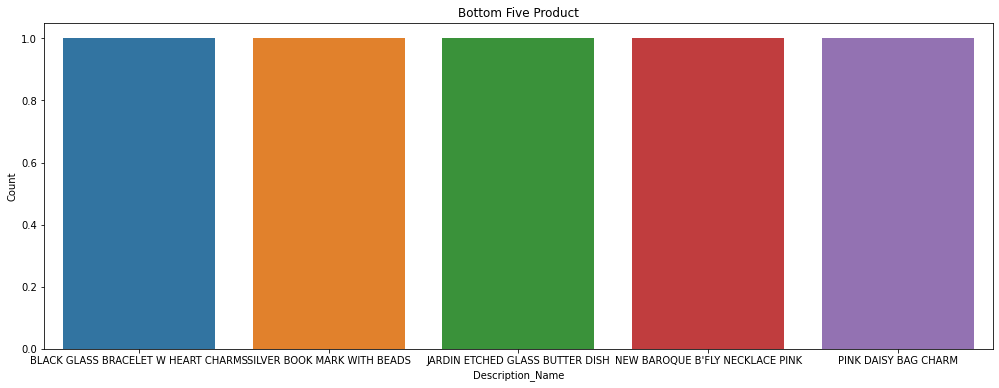

In [446]:
# Plot the bottom 5 product
plt.figure(figsize=(17,6))
plt.title('Bottom Five Product')
sns.barplot(x='Description_Name', y='Count', data = Description_df.tail(5))

# **Country**

In [447]:
# Create a variable and check the country variable and check top 5 countries
country_df = customer_df['Country'].value_counts().reset_index()
country_df.rename(columns = {'index':'Country_Name'}, inplace = True)
country_df.rename(columns = {'Country':'Count'}, inplace = True)
country_df.head()

,Country_Name,Count
0,United Kingdom,354345
1,Germany,9042
2,France,8342
3,EIRE,7238
4,Spain,2485


In [448]:
# Bottom 5 countries
country_df.tail()

,Country_Name,Count
32,Lithuania,35
33,Brazil,32
34,Czech Republic,25
35,Bahrain,17
36,Saudi Arabia,9


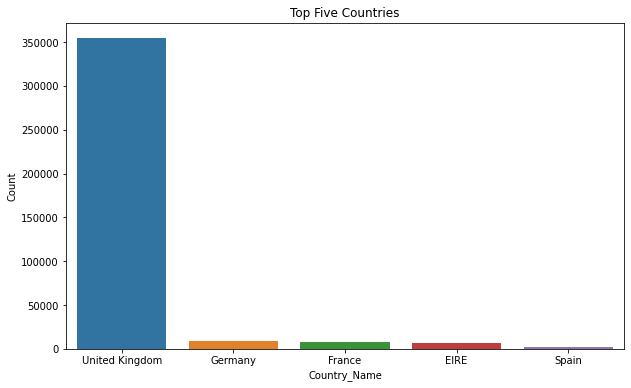

In [449]:
# Plot the top 5 countries
plt.figure(figsize=(10,6))
plt.title('Top Five Countries')
sns.barplot(x='Country_Name', y='Count', data = country_df.head(5))

Insight: From above plot we can see that majority of customers are from United Kingdom.

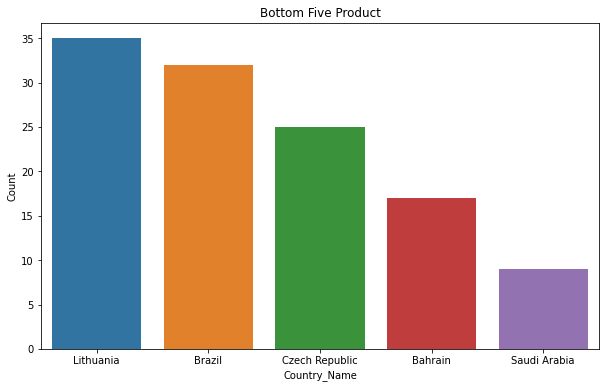

In [450]:
# Plot bottom 5 countries
plt.figure(figsize=(10,6))
plt.title('Bottom Five Product')
sns.barplot(x='Country_Name', y='Count', data = country_df.tail(5))

Insight: The least number of customers are from Saudi Arabia.

# **Analyzing all Numerical Features**

In [451]:
# Assigning numerical columns to variables
numerical_columns = list(customer_df.select_dtypes(['int64','float64']).columns)
numerical_features = pd.Index(numerical_columns)
numerical_features

Index(['Quantity', 'UnitPrice', 'CustomerID', 'InvoiceDate_year',
       'InvoiceDate_month', 'InvoiceDate_day', 'InvoiceDate_hour',
       'InvoiceDate_minute', 'InvoiceDate_second'],
      dtype='object')

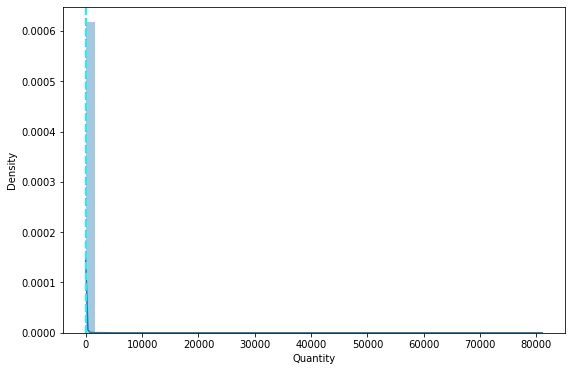

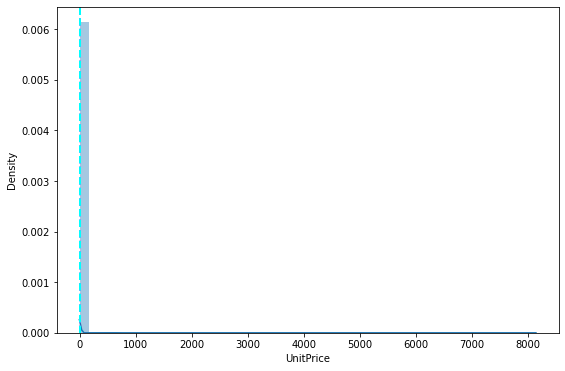

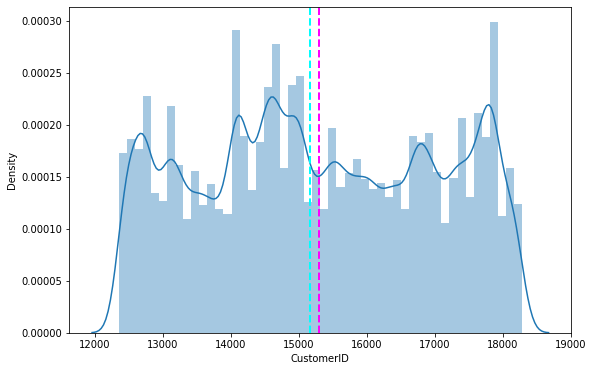

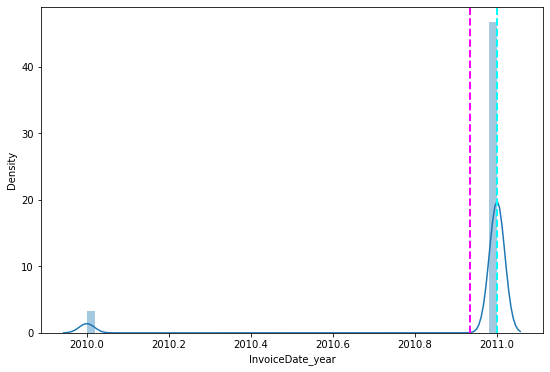

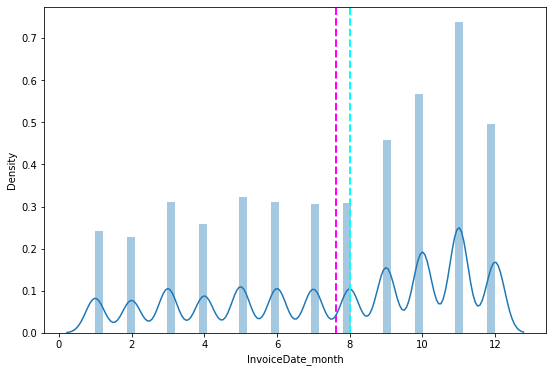

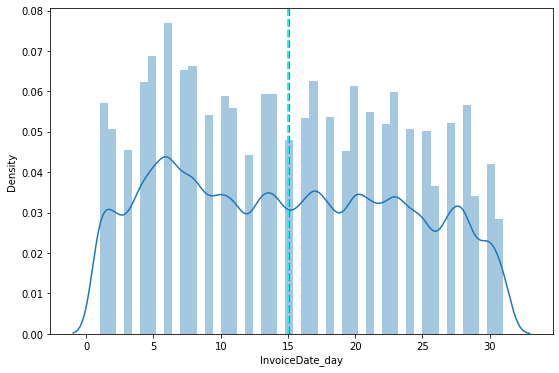

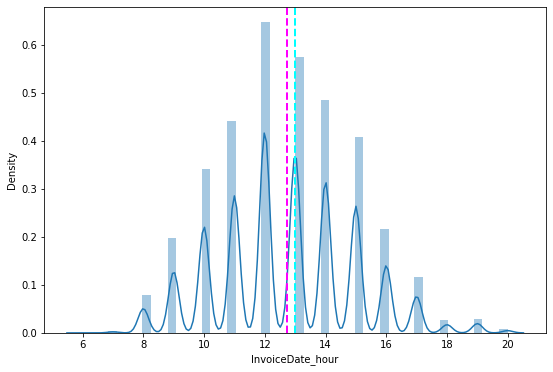

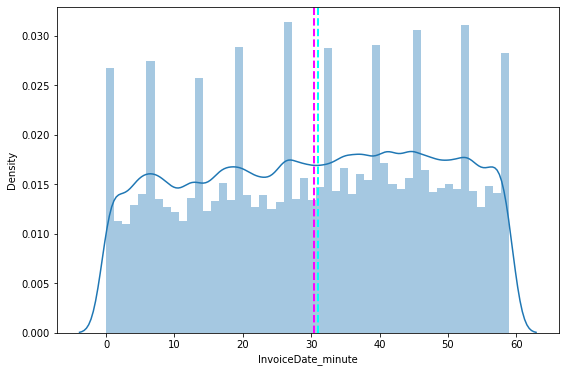

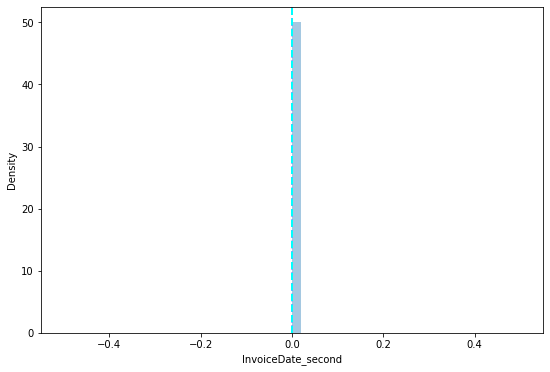

In [452]:
# Analysing distribution of all numerical variables
for col in numerical_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = customer_df[col]
    sns.distplot(x=customer_df[col])
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    plt.xlabel(col)
plt.show()

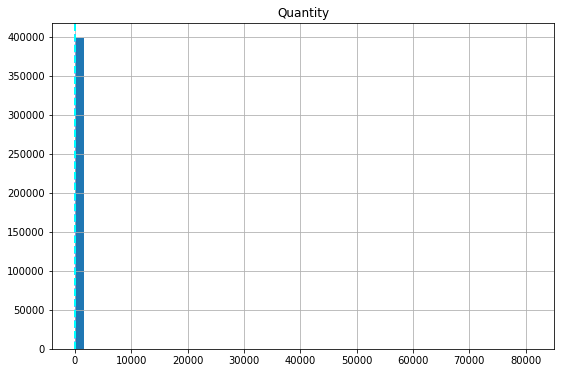

Skewness : 403.31943081039486
Kurtosis : 173965.71516660746


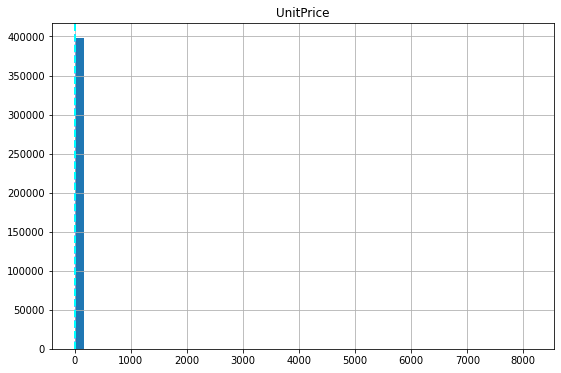

Skewness : 204.04241268899307
Kurtosis : 58146.02091050399


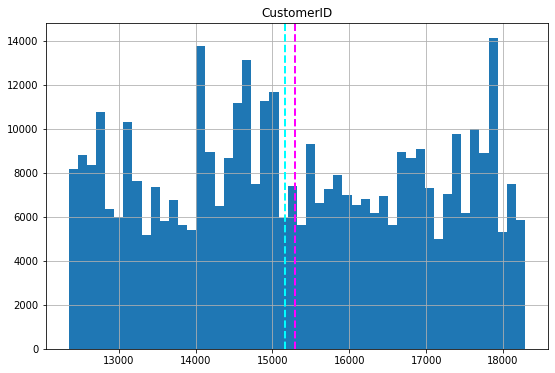

Skewness : 0.02577629847429845
Kurtosis : -1.1808302151571712


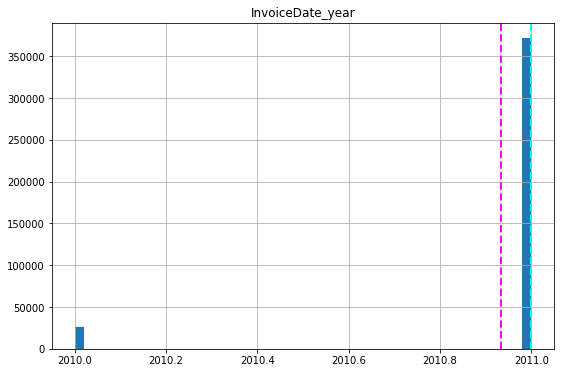

Skewness : -3.5045145019499735
Kurtosis : 10.281673570919017


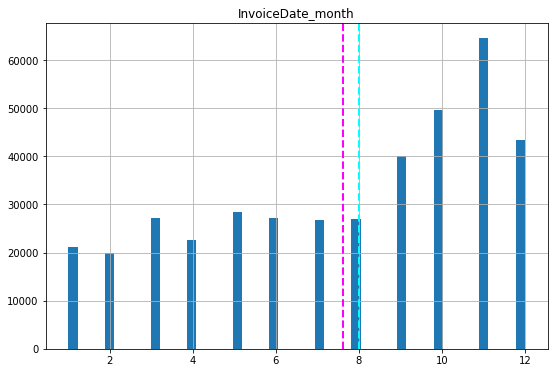

Skewness : -0.4448423572483675
Kurtosis : -1.074460364777609


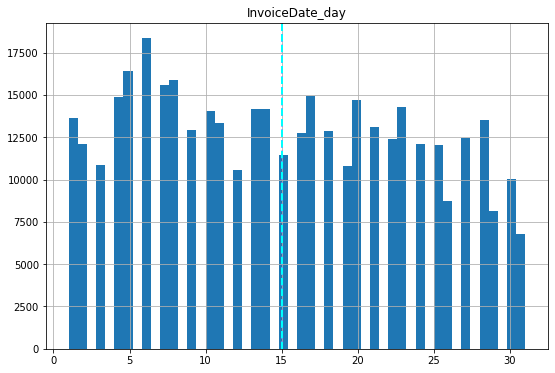

Skewness : 0.1144792789730314
Kurtosis : -1.1728727400772625


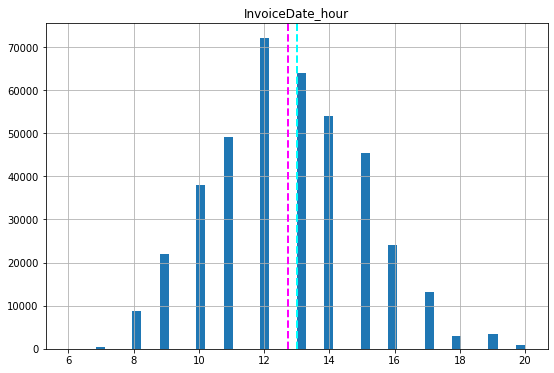

Skewness : 0.18903743045332783
Kurtosis : -0.20968488890482462


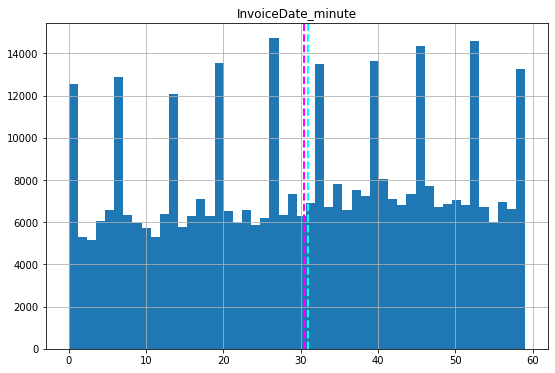

Skewness : -0.08092206133583811
Kurtosis : -1.1655389341755757


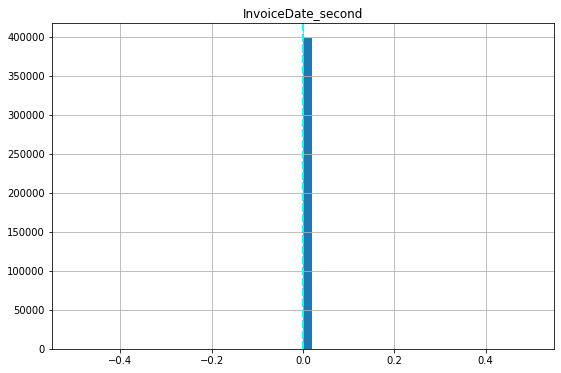

Skewness : 0
Kurtosis : 0


In [453]:
# Analyse all numerical feature using histogram
for col in numerical_features:
  fig=plt.figure(figsize=(9,6))
  ax=fig.gca()
  feature= (customer_df[col])
  feature.hist(bins=50, ax=ax)
  ax.axvline(feature.mean(),color='magenta', linestyle='dashed', linewidth=2)
  ax.axvline(feature.median(),color='cyan', linestyle='dashed', linewidth=2)
  ax.set_title(col)
  plt.show()
  print( "Skewness :",customer_df[col].skew())
  print( "Kurtosis :",customer_df[col].kurt())

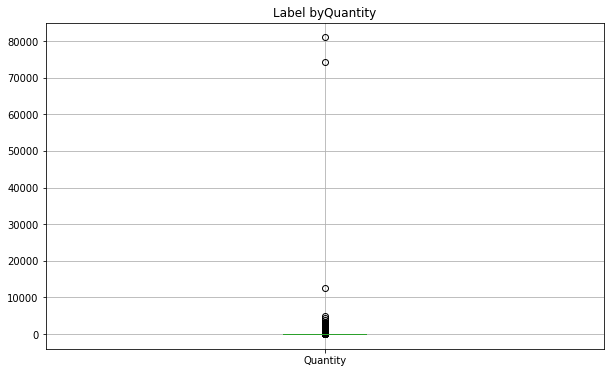

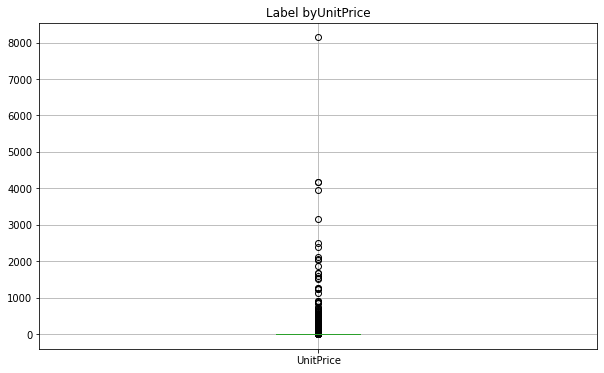

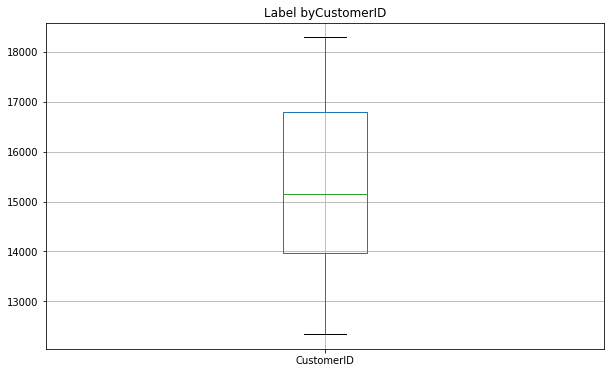

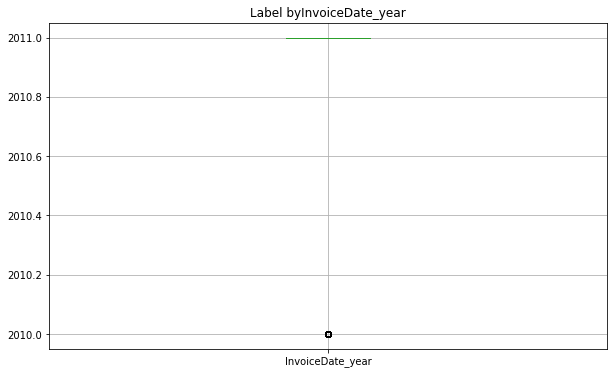

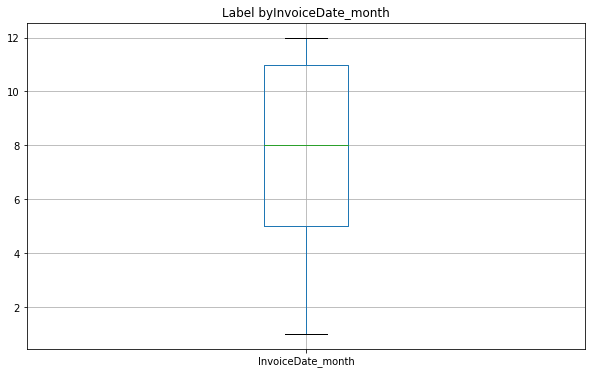

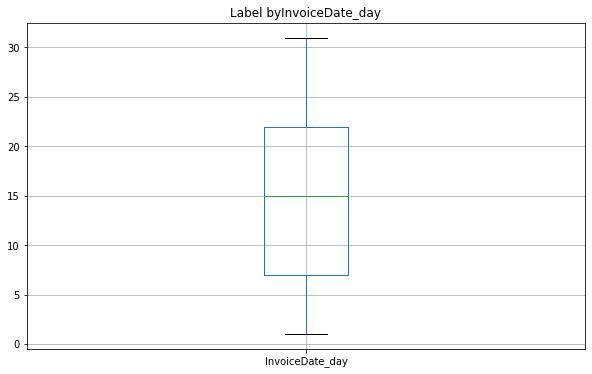

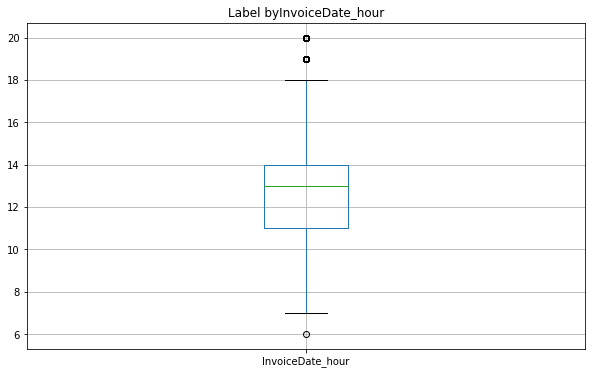

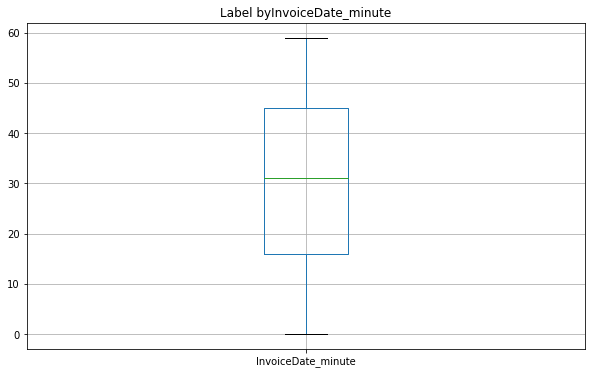

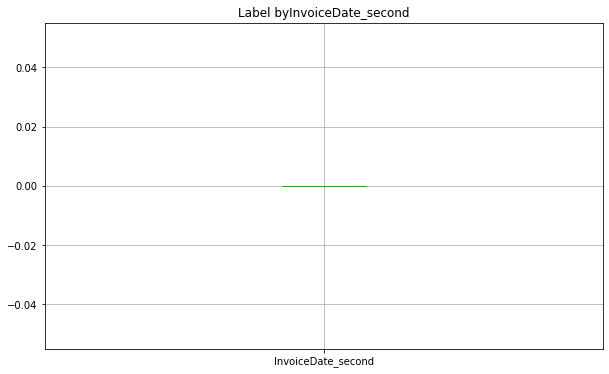

In [454]:
# Plot the box plot for each numerical feature
for col in numerical_features:
  fig = plt.figure(figsize=(10,6))
  ax = fig.gca()
  customer_df.boxplot(col)
  ax.set_title("Label by" + col)
plt.show()

# **Correlation Matrix**

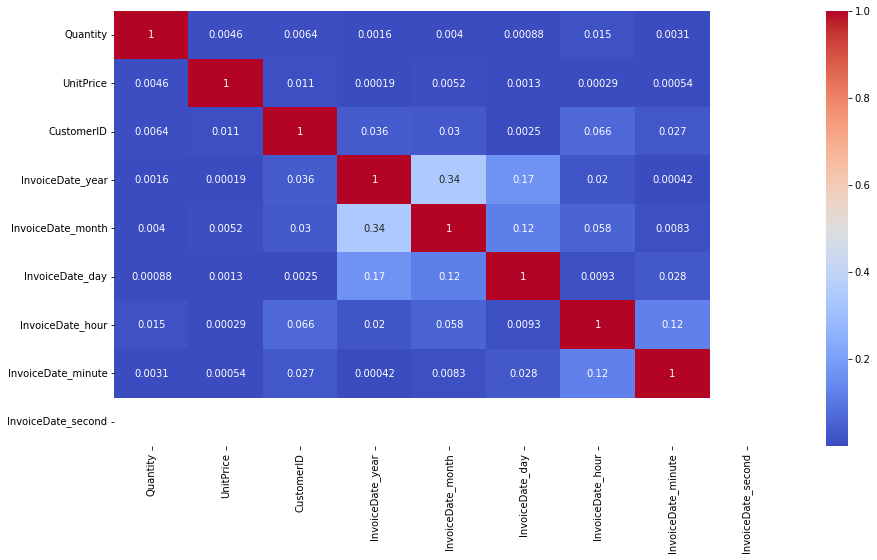

In [455]:
# Plot heatmap to show correlation of different variables
plt.figure(figsize=(15,8))
correlation = customer_df.corr()
sns.heatmap(abs(correlation), annot = True, cmap = "coolwarm")

# **Feature Engineering**

In [456]:
# Create a new feature TotalAmount from product of quamtity and unitprice
customer_df['TotalAmount']= customer_df['Quantity']*customer_df['UnitPrice']

In [457]:
# View the dataset
customer_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceDate_year,InvoiceDate_month,InvoiceDate_day,InvoiceDate_hour,InvoiceDate_minute,InvoiceDate_second,TotalAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,1,8,26,0,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,8,26,0,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12,1,8,26,0,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,8,26,0,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,8,26,0,20.34


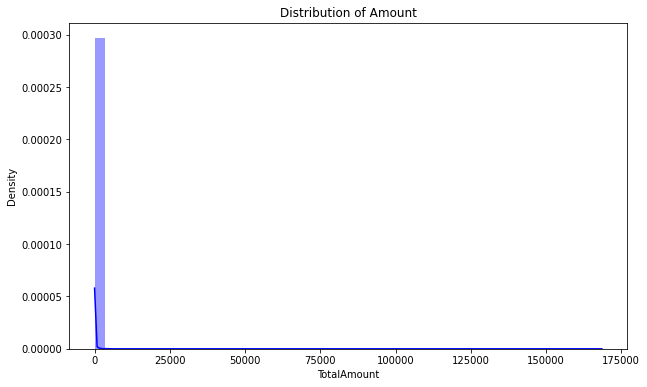

In [458]:
# Plot distribution of amount
plt.figure(figsize=(10,6))
plt.title('Distribution of Amount')
sns.distplot(customer_df['TotalAmount'],color="B")

In [459]:
# Check the description of TotalAmount
customer_df['TotalAmount'].describe()

count    397924.000000
mean         22.394749
std         309.055588
min           0.000000
25%           4.680000
50%          11.800000
75%          19.800000
max      168469.600000
Name: TotalAmount, dtype: float64

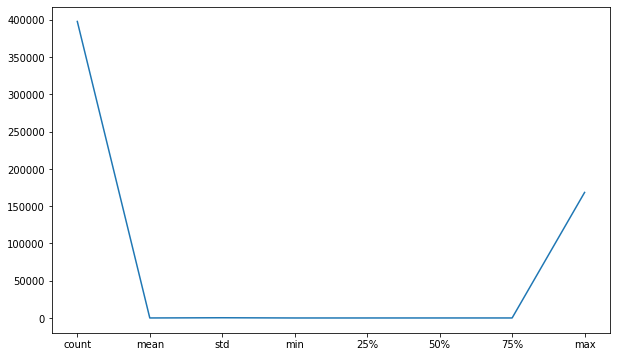

In [460]:
# Plot the description of TotalAmount
plt.figure(figsize=(10,6))
customer_df['TotalAmount'].describe().plot()

In [461]:
# Create a new feature day from Invoicedate
customer_df['Day'] = customer_df['InvoiceDate'].dt.day_name()

In [462]:
# Create a variable and count the day name
day_df = customer_df['Day'].value_counts().reset_index()
day_df.rename(columns = {'index':'Day_Name'}, inplace= True)
day_df.rename(columns = {'Day':'Count'},inplace = True)
day_df

,Day_Name,Count
0,Thursday,80052
1,Wednesday,68888
2,Tuesday,66476
3,Monday,64899
4,Sunday,62775
5,Friday,54834


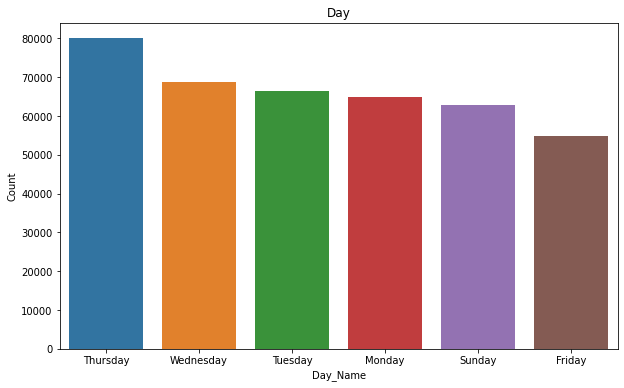

In [463]:
# Plot the number of shopping as per days
plt.figure(figsize=(10,6))
plt.title('Day')
sns.barplot(x= 'Day_Name', y='Count',data=day_df)

Insight: From above plot we can conclude that most number of shopping is done on Thrusday, Wednesday and Tuesday.

In [464]:
# Number of customers shoppping per month
month_df = customer_df['InvoiceDate_month'].value_counts().reset_index()
month_df.rename(columns = {'index':'Month_Name'},inplace = True)
month_df.rename(columns = {'InvoiceDate_month':'Count'},inplace = True)
month_df

,Month_Name,Count
0,11,64545
1,10,49557
2,12,43464
3,9,40030
4,5,28322
5,6,27185
6,3,27177
7,8,27013
8,7,26827
9,4,22644


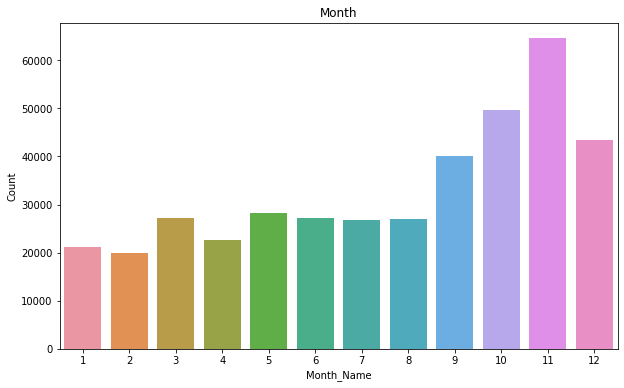

In [465]:
# Plot the result
plt.figure(figsize=(10,6))
plt.title('Month')
sns.barplot(x='Month_Name', y='Count', data=month_df)

Insight: Most number of purchasing is done in the month of november.

In [466]:
# Analyze the number of items purchased throughout the day
hour_df=customer_df['InvoiceDate_hour'].value_counts().reset_index()
hour_df.rename(columns={'index': 'Hour_Name'}, inplace=True)
hour_df.rename(columns={'InvoiceDate_hour': 'Count'}, inplace=True)
hour_df

,Hour_Name,Count
0,12,72069
1,13,64031
2,14,54127
3,11,49092
4,15,45372
5,10,37999
6,16,24093
7,9,21945
8,17,13072
9,8,8691


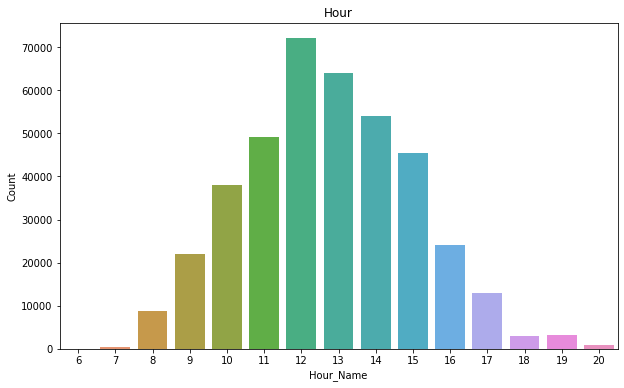

In [467]:
# Plot the result
plt.figure(figsize=(10,6))
plt.title('Hour')
sns.barplot(x='Hour_Name', y='Count', data=hour_df)

Insight: Most of the purchasing was done after 12pm.

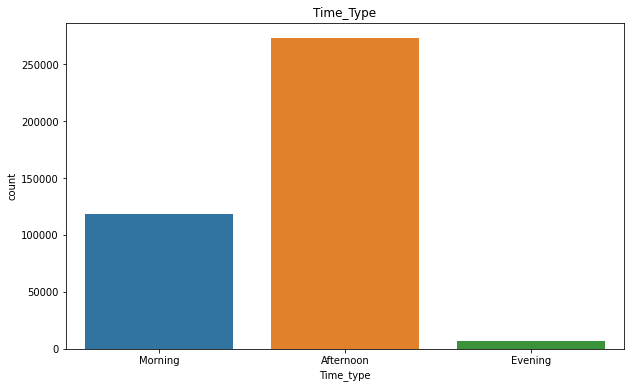

In [468]:
# Lets distribute the day in Morining Afternoon and Evening
def time_type(time):
  if(time==6 or time==7 or time==8 or time==9 or time==10 or time==11):
    return 'Morning'
  elif(time==12 or time==13 or time==14 or time==15 or time==16 or time==17):
    return 'Afternoon'
  else:
    return 'Evening'
customer_df['Time_type']=customer_df['InvoiceDate_hour'].apply(time_type)
# Plot the graph
plt.figure(figsize=(10,6))
plt.title('Time_Type')
sns.countplot(x='Time_type', data = customer_df)

Insight: From above plot we can conclude that most number of purchasing is done in afternoon and least number of purchasing is done in evening.

# **Creating Recency, Frequency and Monetary(RFM) Model**

Before applying any clustering algorithms it is always necessary to determine various quantitative factors on which the algorithm will perform segmentation. Examples of these would be features such as amount spend, activeness of the customer, their last visit, etc.

*   RFM model which stands for Recency, Frequency, and Monetary is one of such steps in which we determine the recency - days to last visit, frequency - how actively the customer repurchases and monetary - total expenditure of the customer, for each customer. There are other steps too in which we divide each of these features accordingly and calculate a score for each customer. However, this approach doesnot require machine learning algorithms as segmentation can be done manually. Therefore we will skip the second step and directly use the rfm features and feed it to clustering algorithms.

*   Recency = Latest Date - Last Inovice Data
*   Frequency = count of invoice no. of transaction(s)
*   Monetary = Sum of Total Amount for each customer

In [469]:
# Set Latest date 2011-12-10 as last invoice date was 2011-12-09
#This is to calculate the number of days from recent purchase
Latest_Date = dt.datetime(2011,12,10)

In [470]:
# Create RFM modelling for each customer
rfm_df = customer_df.groupby('CustomerID').agg({'InvoiceDate': lambda x: (Latest_Date - x.max()).days, 'InvoiceNo': lambda x: len(x), 
                                                'TotalAmount': lambda x: x.sum()})

#Convert Invoice Date into type int
rfm_df['InvoiceDate'] = rfm_df['InvoiceDate'].astype(int)

#Rename column names to Recency, Frequency and Monetary
rfm_df.rename(columns={'InvoiceDate': 'Recency', 
                         'InvoiceNo': 'Frequency', 
                         'TotalAmount': 'Monetary'}, inplace=True)

rfm_df.reset_index().head()


,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,1,77183.60
1,12347.0,2,182,4310.00
2,12348.0,75,31,1797.24
3,12349.0,18,73,1757.55
4,12350.0,310,17,334.40


In [471]:
# Descriptive Staistics
rfm_df.Recency.describe()

count    4339.000000
mean       92.041484
std       100.007757
min         0.000000
25%        17.000000
50%        50.000000
75%       141.500000
max       373.000000
Name: Recency, dtype: float64

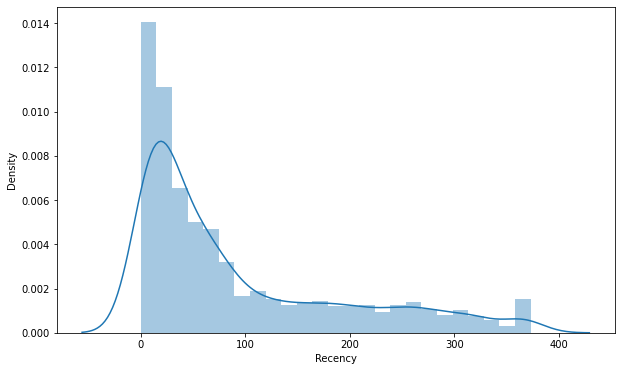

In [472]:
# Recency Distribution Plot
x = rfm_df['Recency']
plt.figure(figsize=(10,6))
sns.distplot(x)

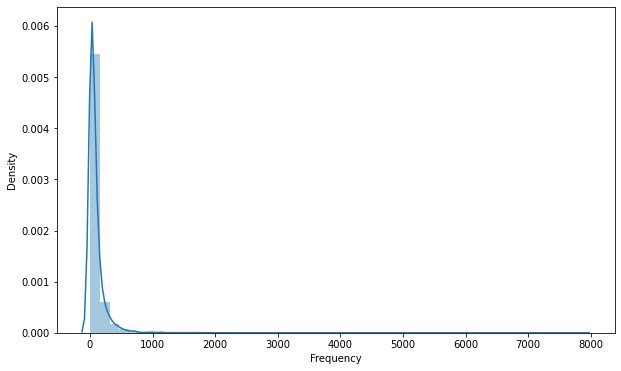

In [473]:
# Desriptive Statistics (Frequency)
x = rfm_df['Frequency']
plt.figure(figsize=(10,6))
sns.distplot(x)

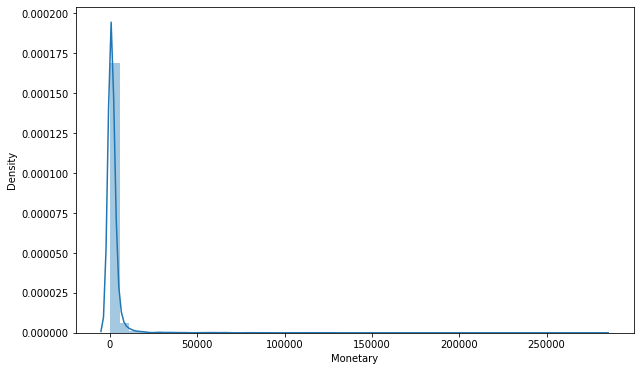

In [474]:
# Descriptive Staistics (Monetray)
x = rfm_df['Monetary']
plt.figure(figsize=(10,6))
sns.distplot(x)

**Split into four segments using Quantiles**

In [475]:
# Split into four segments using quantiles
quantiles = rfm_df.quantile(q=[0.25,0.5,0.75])
quantiles = quantiles.to_dict()
quantiles                           

{'Frequency': {0.25: 17.0, 0.5: 41.0, 0.75: 100.0},
 'Monetary': {0.25: 307.24499999999995, 0.5: 674.4499999999998, 0.75: 1661.64},
 'Recency': {0.25: 17.0, 0.5: 50.0, 0.75: 141.5}}

In [476]:
# Functions to create R,F and M segments
def RScoring(x,p,d):
  if x <= d[p][0.25]:
    return 1
  elif x <= d[p][0.5]:
    return 2
  elif x <= d[p][0.75]:
    return 3
  else:
    return 4
def FnMScoring(x,p,d):
  if x <= d[p][0.25]:
    return 4
  elif x <= d[p][0.5]:
    return 3
  elif x <= d[p][0.75]:
    return 2
  else:
    return 1


In [477]:
# Calculate and addd R, F and M segment value columns in the existing dataset to show R, F and M segment values
rfm_df['R'] = rfm_df['Recency'].apply(RScoring, args=('Recency',quantiles,))
rfm_df['F'] = rfm_df['Frequency'].apply(FnMScoring, args=('Frequency',quantiles,))
rfm_df['M'] = rfm_df['Monetary'].apply(FnMScoring, args=('Monetary',quantiles,))
rfm_df.head()

,Recency,Frequency,Monetary,R,F,M
CustomerID,,,,,,
12346.0,325,1,77183.60,4,4,1
12347.0,2,182,4310.00,1,1,1
12348.0,75,31,1797.24,3,3,1
12349.0,18,73,1757.55,2,2,1
12350.0,310,17,334.40,4,4,3


In [478]:
# Calculate and Add RFMGroup value column showing combined concatenated score of RFM
rfm_df['RFMGroup'] = rfm_df.R.map(str) + rfm_df.F.map(str) + rfm_df.M.map(str)

In [479]:
#Calculate and Add RFMScore value column showing total sum of RFMGroup values
rfm_df['RFMScore'] = rfm_df[['R', 'F', 'M']].sum(axis = 1)
rfm_df.head()

,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore
CustomerID,,,,,,,,
12346.0,325,1,77183.60,4,4,1,441,9
12347.0,2,182,4310.00,1,1,1,111,3
12348.0,75,31,1797.24,3,3,1,331,7
12349.0,18,73,1757.55,2,2,1,221,5
12350.0,310,17,334.40,4,4,3,443,11


In [480]:
# Handle negative and zero values so as to handle infinite numbers during log transformation
def handle_neg_n_zero(num):
  if num <= 0:
    return 1
  else:
    return num
# Apply handle_neg_n_zero function to Recency and Monetary columns
rfm_df['Recency'] = [handle_neg_n_zero(x) for x in rfm_df.Recency]
rfm_df['Monetray'] = [handle_neg_n_zero(x) for x in rfm_df.Monetary]

# **Log Transformation**

In [489]:
# Perform log transformation to bring data closer to normal
Log_Tfd_Data = rfm_df[['Recency','Frequency','Monetary']].apply(np.log,axis=1).round(3)

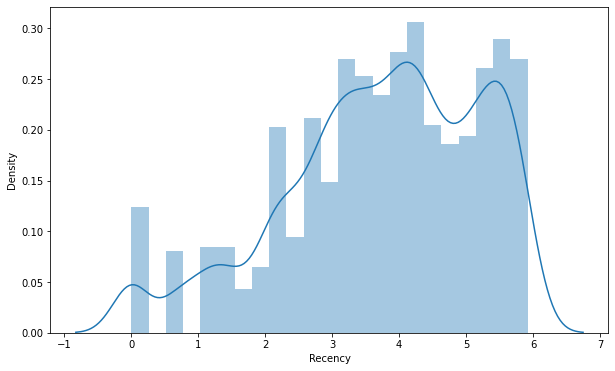

In [490]:
# Distribution plot after Log transformation
Recency_Plot = Log_Tfd_Data['Recency']
plt.figure(figsize=(10,6))
sns.distplot(Recency_Plot)

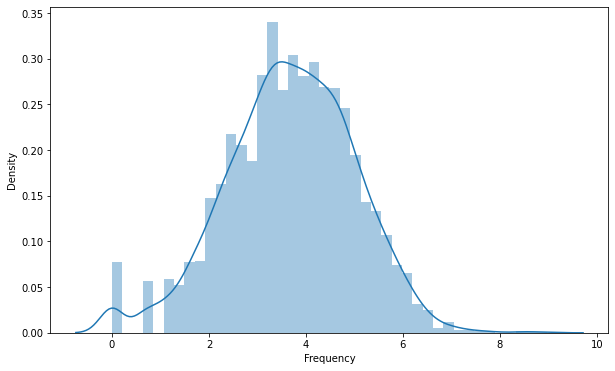

In [493]:
# Data distribution after data normalization for Frequency
Frequency_Plot = Log_Tfd_Data['Frequency']
plt.figure(figsize=(10,6))
sns.distplot(Frequency_Plot)

In [ ]:
#Data distribution after data normalization for Monetary
Monetary_Plot = Log_Tfd_Data.query('Monetary < 10000')['Monetary']
plt.figure(figsize=(10,6))
sns.distplot(Monetary_Plot)

In [ ]:
#plt.figure(figsize=(10,6))
#sns.distplot(np.sqrt(rfm_df['Monetary']),color="y")